# Heart Failure Prediction Dataset

##### Activity performed for the discipline "Data Mining"

##### [Matheus Pimenta](https://github.com/omatheuspimenta)

### Accessed in Oct. 2021

### Available [here](heart_2.csv)

## Description

### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
  Total: 1190 observations
  Duplicated: 272 observations
  Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

### For more information visit the Kaggle site.


## Importing the libraries


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset using Pandas API


In [72]:
df = pd.read_csv('heart_2.csv')

## Getting some information about the dataset


In [73]:
print("Dataset shape:{}\nThere are {} rows and {} columns.".format(
    df.shape, df.shape[0], df.shape[1]))
df.head(3)

Dataset shape:(1025, 14)
There are 1025 rows and 14 columns.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0


There are 1024 rows and 14 columns, that is, 1024 samples and 13 features + 1 output label, in this case, the column "HeartDisease" represents if the sample has heart diseases.

## As per the [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction) description, where this dataset was adapted from.

### Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


In [74]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## There are some categorical columns

In [75]:
continuous_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg",
                        "exang", "slope", "ca", "thal", "target"]

## Getting the mean, standard deviation, mode and, variance for all continuous values.


In [76]:
pd.options.display.float_format = "{:.2f}".format
print("Describe:\n", df[continuous_features].describe().T)
print("Variance:\n", df[continuous_features].var().T)
print("Mode:\n", df[continuous_features].mode().T)

Describe:
            count   mean   std    min    25%    50%    75%    max
age      1025.00  54.43  9.07  29.00  48.00  56.00  61.00  77.00
trestbps 1025.00 131.61 17.52  94.00 120.00 130.00 140.00 200.00
chol     1025.00 246.00 51.59 126.00 211.00 240.00 275.00 564.00
thalach  1025.00 149.11 23.01  71.00 132.00 152.00 166.00 202.00
oldpeak  1025.00   1.07  1.18   0.00   0.00   0.80   1.80   6.20
Variance:
 age          82.31
trestbps    306.84
chol       2661.79
thalach     529.26
oldpeak       1.38
dtype: float64
Mode:
               0      1
age       58.00    NaN
trestbps 120.00    NaN
chol     204.00 234.00
thalach  162.00    NaN
oldpeak    0.00    NaN


## Boxplot for the column "Oldpeak"


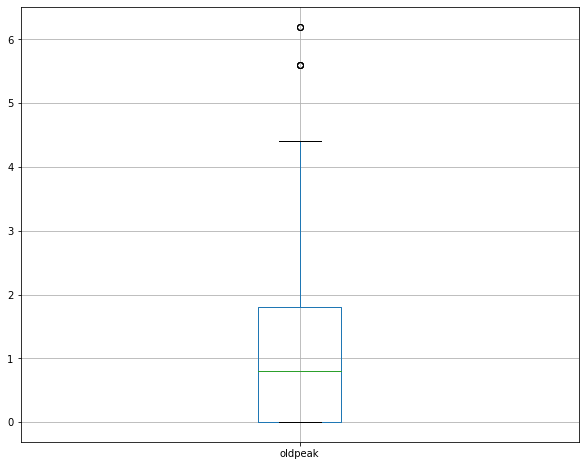

In [77]:
boxplot = df.boxplot(column=['oldpeak'], figsize=(10, 8))

Analyzing the boxplot the median is 0.8 and the quartiles are 0.0, 0.8 and 1.8.

## Creating histograms

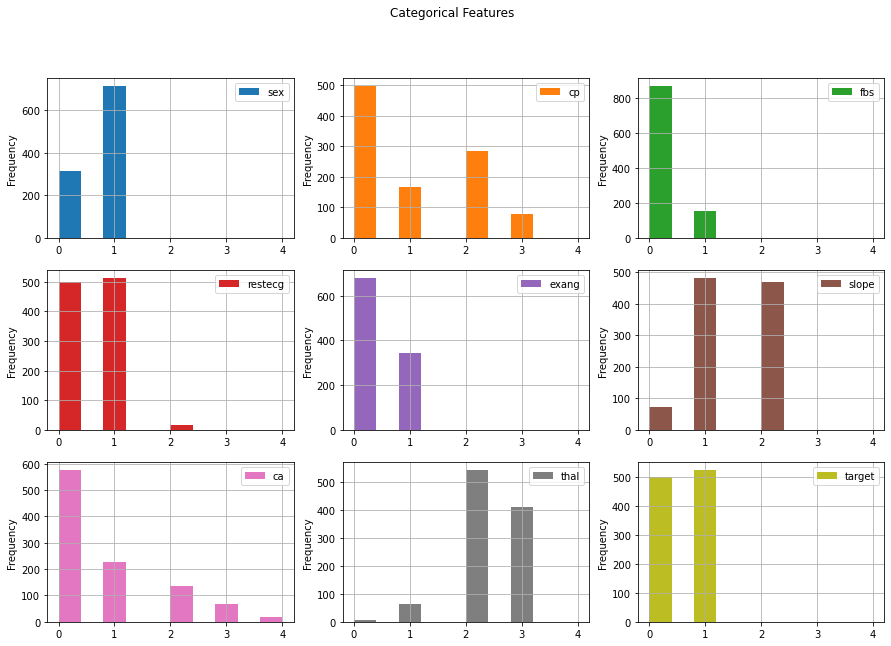

In [78]:
ax = df[categorical_features].plot(kind='hist',
                                   sharex=False,
                                   sharey=False,
                                   subplots=True,
                                   figsize = (15,10),
                                   layout=(3, 3),
                                   grid=True,
                                   title='Categorical Features')


## Creating barplots for the categorical columns

Text(0.5, 0.98, 'Categorical Features')

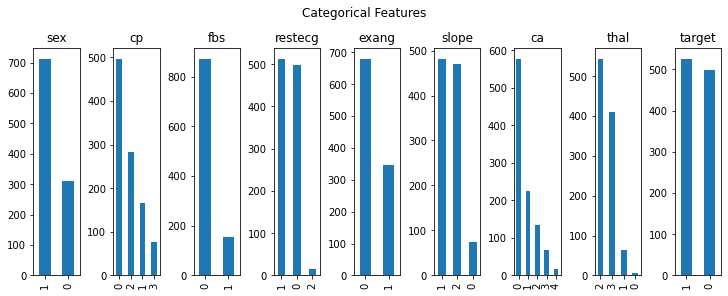

In [79]:
fig, ax = plt.subplots(1, len(categorical_features),
                       figsize=(10, 4), constrained_layout=True)
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(
        kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.suptitle('Categorical Features')
# fig.show()
